In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [44]:
data = pd.read_csv('/Users/bartlomiejszafran/Desktop/Project/911.csv')

In [45]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [46]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [47]:
data['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [48]:
data['title'].nunique()

110

In [49]:
data['Reasons'] = data['title'].apply(lambda title: title.split(':')[0])

In [50]:
data['Reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

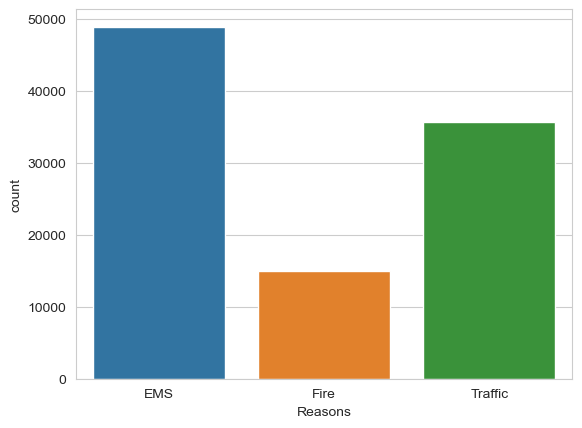

In [51]:
sns.countplot(x='Reasons', data=data)
plt.show()

In [52]:
type(data['timeStamp'].iloc[0])
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

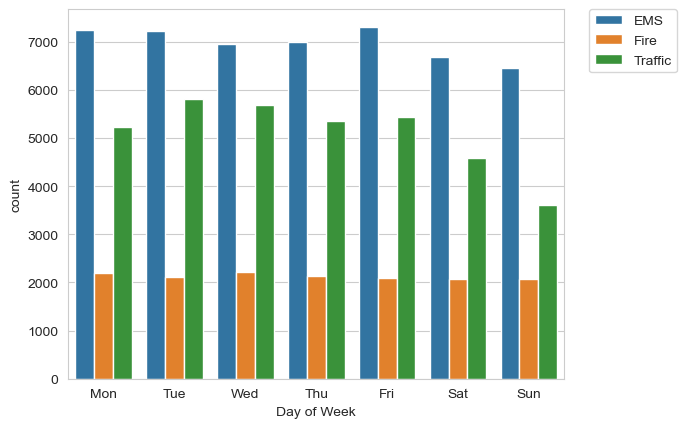

In [53]:
day_order = ['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='Day of Week',data=data, hue='Reasons', order=day_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

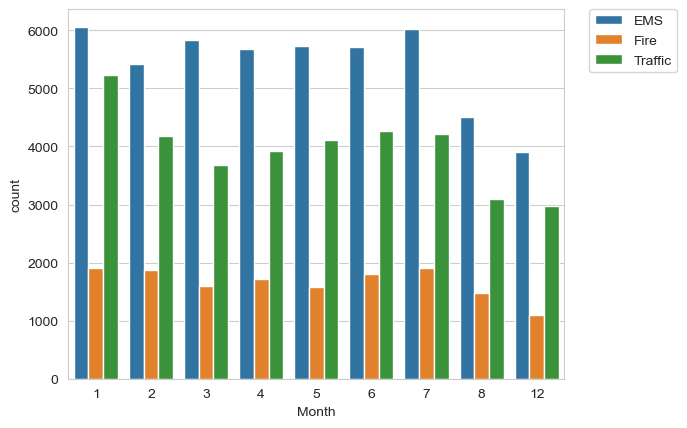

In [54]:
sns.countplot(x='Month',data=data, hue='Reasons')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [55]:
byMonth = data.groupby('Month').count()

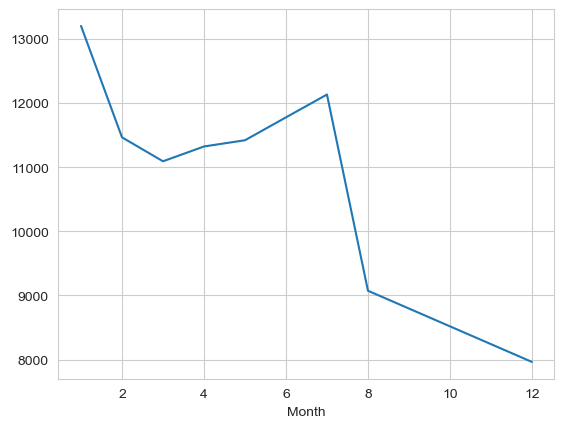

In [56]:
byMonth['twp'].plot()
plt.show()

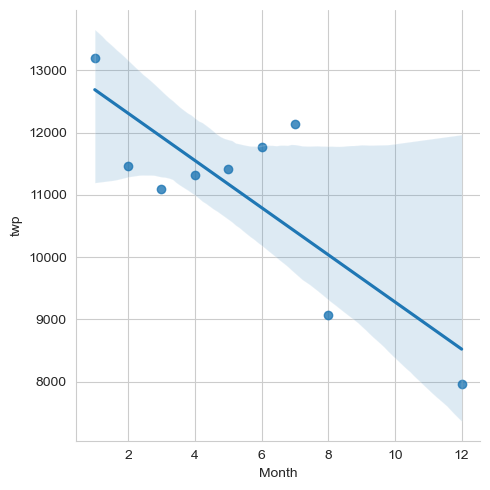

In [57]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
plt.show()

In [58]:
data['Date']=data['timeStamp'].apply(lambda t: t.date())

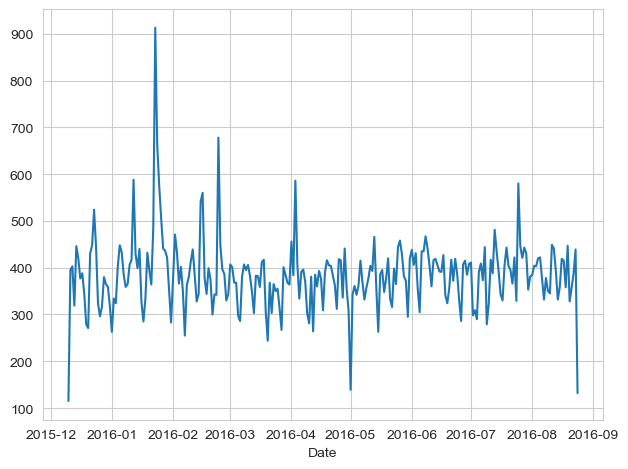

In [59]:
data.groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [61]:
dayHour = data.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


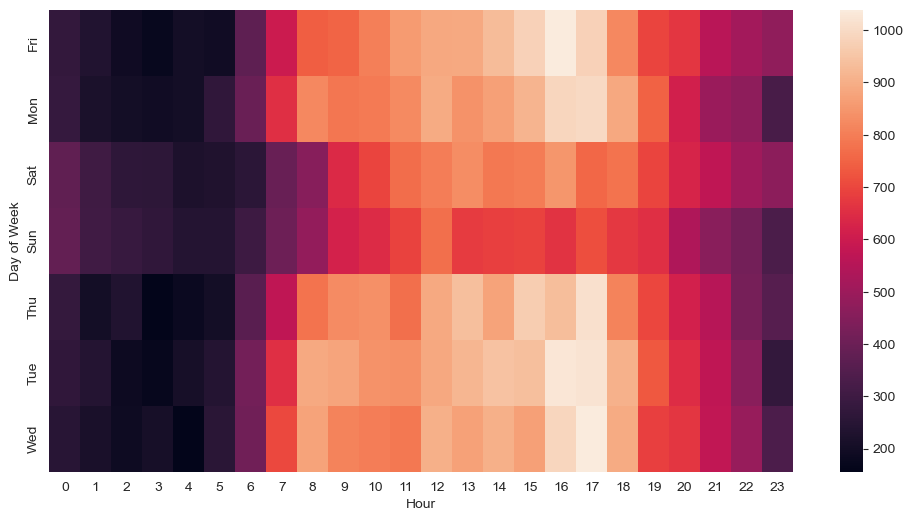

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour)
plt.show()